In [1]:
import trimesh
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load the mesh from filename
# file objects are also supported
mesh = trimesh.load_mesh('../models/featuretype.STL')

In [3]:
# we're going to slice the mesh into evenly spaced chunks along z
# this takes the (2,3) bounding box and slices it into [minz, maxz]
z_extents = mesh.bounds[:,2]

In [4]:
# slice every .125 model units (eg, inches)
z_levels  = np.arange(*z_extents, step=.125)

In [5]:
# create an array to hold the section objects
sections  = [None] * len(z_levels)

In [6]:
for i, z in enumerate(z_levels):
    # this will return a Path3D object, each of which will 
    # have curves in 3D space
    sections[i] = mesh.section(plane_origin = [0,0,z],
                               plane_normal = [0,0,1])

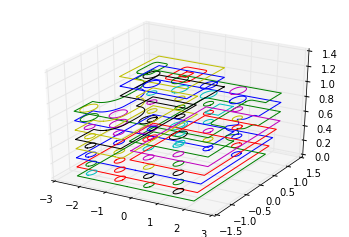

In [7]:
# summing the array of path objects will put all of the curves
# into one Path3D object, which we can then plot easily in 3D
combined = np.sum(sections)
combined.show()

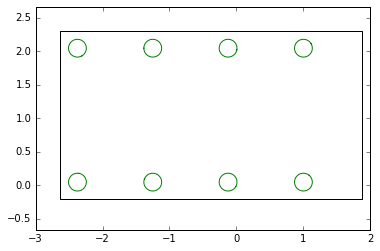

In [8]:
# we can also transform each section in space onto the XY plane
# note that if the Path3D object couldn't find a plane which all 
# of the entities lie on, it will raise an exception
section_2D, T_matrix = sections[0].to_planar()
section_2D.show()